In [43]:
import numpy as np
import pandas as pd
import sklearn.neighbors
from data_preparation import get_processed_renttherunway_data, get_test_runttherunway_data, get_train_runttherunway_data
from baseline_model import BaselineModel
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn.metrics 
from evaluation import create_confusion_matrix, show_confusion_matrix

LOAD_MODELS = False

# Baseline model

$ p(\mathcal{S}, \mathcal{R} | \mathcal{C}, \mathcal{A}) =
p(\mathcal{S}|\mathcal{C}\mathcal{A})p(\mathcal{R}|\mathcal{C}\mathcal{A})$  

**Probability over sizes**  
$p(s|c_j) = \frac{1}{n_jh_j}\sum_{i=1}^{n_j} \phi(\frac{s-s_i}{h_j})
= \frac{1}{n_j}\sum_{i=1}^{n_j} \frac{1}{h_j\sqrt{2\pi}}e^{(\frac{s-s_i}{h_j})^2}$  
$= \frac{1}{n_j}\sum_{i=1}^{n_j} \mathcal{N}(s | s_i, h_j^2)$  
$= \frac{1}{n_jh_j\sqrt{2\pi}}\sum_{i=1}^{n_j} e^{(\frac{s-s_i}{h_j})^2}$   $

Where:  
$\phi$ - normal density function  
$h_j$ - bandwidth parameter for specific customer, for now we are using 1 for all customers. 

**Probablity over return status**  
$p(\mathcal{R}|\mathcal{C}\mathcal{A}) = p(\mathcal{R}|\mathcal{A})$  
$p(r|a_i) = \frac{n_{i, r} + 1}{n_i + 3}$   
Article $a_i$ was ordered $n_i$ times and got return status $r$ $n_{i, r}$ times.  

------------------

**NOTES:**  
We could add parameter like so:  
$p(r|a_i) = \frac{n_{i, r} + 
\rho}{n_i + 3\rho}$   


## Full Dataset test

In [44]:
df = get_processed_renttherunway_data()

In [45]:
if LOAD_MODELS:
    full_result = pd.read_csv("results/baseline_full_results_trained_on_full.csv")
else:
    bs = BaselineModel()
    bs.train_model(df)
    full_result = bs.full_predict_and_logprob(df)
    full_result.to_csv("results/baseline_full_results_trained_on_full.csv", index=False)


Predicted_size
Predicted return status


In [46]:
full_result

,result_original,user_id_original,item_id_original,size,review_date,category,user_id,item_id,result,predicted_size,...,2,predicted_return_status,predicted_return_status_prob,predicted_return_status_logprob,return_status_prob,return_status_logprob,full_predicted_prob,full_predicted_logprob,full_prob,full_logprob
0,fit,420272,2260466,14,"April 20, 2016",romper,44334,4396,0,14,...,0.322581,0,0.645161,-0.438255,0.645161,-0.438255,0.177394,-1.729385,0.177394,-1.729385
1,fit,273551,153475,12,"June 18, 2013",gown,28835,65,0,12,...,0.080460,0,0.783525,-0.243952,0.783525,-0.243952,0.312581,-1.162891,0.312581,-1.162891
2,fit,360448,1063761,4,"December 14, 2015",sheath,37976,1945,0,4,...,0.250000,0,0.714286,-0.336472,0.714286,-0.336472,0.284959,-1.255411,0.284959,-1.255411
3,fit,909926,126335,8,"February 12, 2014",dress,96080,7,0,8,...,0.047683,0,0.748217,-0.290062,0.748217,-0.290062,0.298496,-1.209000,0.298496,-1.209000
4,fit,151944,616682,12,"September 26, 2016",gown,15959,1032,0,16,...,0.034188,0,0.931624,-0.070826,0.931624,-0.070826,0.265510,-1.326103,0.053184,-2.933999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,8,"May 18, 2016",jumpsuit,7026,4382,0,8,...,0.021277,0,0.893617,-0.112478,0.893617,-0.112478,0.254678,-1.367755,0.254678,-1.367755
192540,fit,118398,682043,4,"September 30, 2016",dress,12494,1164,0,4,...,0.183099,0,0.746479,-0.292388,0.746479,-0.292388,0.199637,-1.611252,0.199637,-1.611252
192541,fit,47002,683251,8,"March 4, 2016",dress,5019,1166,0,8,...,0.255639,0,0.721805,-0.326001,0.721805,-0.326001,0.203995,-1.589662,0.203995,-1.589662
192542,fit,961120,126335,16,"November 25, 2015",dress,101534,7,0,16,...,0.047683,0,0.748217,-0.290062,0.748217,-0.290062,0.298496,-1.209000,0.298496,-1.209000


------ Return status results ------
Mean target probability:  0.627207998160124
Mean target log probability:  -0.6118634657298393
STATS:                precision    recall  f1-score   support

           0       0.77      0.97      0.86    142058
           1       0.67      0.20      0.30     24707
           2       0.64      0.18      0.28     25779

    accuracy                           0.76    192544
   macro avg       0.69      0.45      0.48    192544
weighted avg       0.74      0.76      0.71    192544



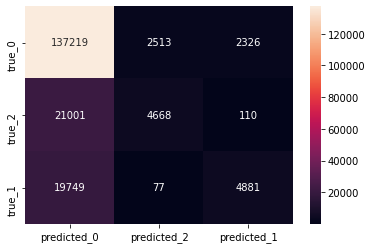

In [47]:
print("------ Return status results ------")
print("Mean target probability: ", full_result["return_status_prob"].mean())
print("Mean target log probability: ", full_result["return_status_logprob"].mean())
print("STATS: ", sklearn.metrics.classification_report(full_result["result"], full_result["predicted_return_status"]))
show_confusion_matrix(full_result, "result", "predicted_return_status")

In [48]:
print("------ Size results ------")
print("Mean target probability: ", full_result["size_prob"].mean())
print("Mean target log probability: ", full_result["size_logprob"].mean())
print("STATS: ", sklearn.metrics.classification_report(full_result["size"], full_result["predicted_size"]))
#show_confusion_matrix(full_result, "size", "predicted_size")

------ Size results ------
Mean target probability:  0.29663856459606497
Mean target log probability:  -1.3219672449644497


/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


STATS:                precision    recall  f1-score   support

           0       0.81      0.77      0.79       526
           1       0.79      0.84      0.81     13719
           2       0.74      0.72      0.73       729
           3       0.69      0.74      0.72       711
           4       0.77      0.82      0.80     29562
           5       0.82      0.74      0.78      1739
           6       1.00      0.22      0.36         9
           7       0.80      0.73      0.76       673
           8       0.78      0.82      0.80     40804
           9       0.84      0.74      0.79      2651
          10       1.00      1.00      1.00         3
          11       0.79      0.71      0.75       437
          12       0.77      0.72      0.75     24702
          13       0.43      0.76      0.55      2573
          14       0.69      0.49      0.58     11921
          15       0.11      0.66      0.19       353
          16       0.77      0.72      0.74     17668
          17       

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packa

In [49]:

print("------ Combined result ------")
print("Mean target probability: ", full_result["full_prob"].mean())
print("Mean target log probability: ", full_result["full_logprob"].mean())

------ Combined result ------
Mean target probability:  0.1882236758509267
Mean target log probability:  -1.9338307106942894


## Test on split dataset

In [50]:
if LOAD_MODELS:
    train_result = pd.read_csv("results/baseline_results_train_trained_on_train.csv")
    test_result = pd.read_csv("results/baseline_results_test_trained_on_train.csv")
else:
    bs = BaselineModel()
    train = get_train_runttherunway_data()
    test = get_test_runttherunway_data()
    bs.train_model(train)
    train_result = bs.full_predict_and_logprob(train)
    train_result.to_csv("results/baseline_results_train_trained_on_train.csv", index=False)
    test_result = bs.full_predict_and_logprob(test)
    test_result = pd.read_csv("results/baseline_results_test_trained_on_train.csv")



Predicted_size
Predicted return status
Predicted_size
Predicted return status


TRAIN DATA
------ Return status results ------
Mean target probability:  0.6265592026856295
Mean target log probability:  -0.6108522590414879
STATS:                precision    recall  f1-score   support

           0       0.77      0.97      0.86    127859
           1       0.67      0.20      0.31     22219
           2       0.65      0.19      0.29     23211

    accuracy                           0.76    173289
   macro avg       0.70      0.45      0.48    173289
weighted avg       0.74      0.76      0.71    173289

------ Size results ------
Mean target probability:  0.3006320347598758
Mean target log probability:  -1.3047251771957795
------ Combined result ------
Mean target probability:  0.19048296684482388
Mean target log probability:  -1.915577436237267


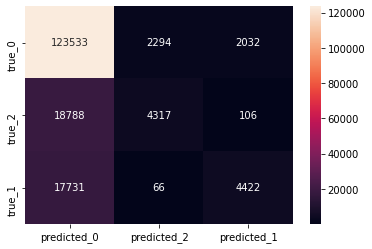

In [51]:
print("TRAIN DATA")
print("------ Return status results ------")
print("Mean target probability: ", train_result["return_status_prob"].mean())
print("Mean target log probability: ", train_result["return_status_logprob"].mean())
print("STATS: ", sklearn.metrics.classification_report(train_result["result"], train_result["predicted_return_status"]))
show_confusion_matrix(train_result, "result", "predicted_return_status")
print("------ Size results ------")
print("Mean target probability: ", train_result["size_prob"].mean())
print("Mean target log probability: ", train_result["size_logprob"].mean())
print("------ Combined result ------")
print("Mean target probability: ", train_result["full_prob"].mean())
print("Mean target log probability: ", train_result["full_logprob"].mean())

In [52]:
train_size_classification_stats = sklearn.metrics.classification_report(train_result["size"], train_result["predicted_size"])
print(train_size_classification_stats)


/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       486
           1       0.80      0.84      0.82     12384
           2       0.75      0.73      0.74       640
           3       0.69      0.76      0.72       631
           4       0.78      0.83      0.80     26604
           5       0.83      0.75      0.79      1562
           6       1.00      0.29      0.44         7
           7       0.79      0.76      0.78       613
           8       0.79      0.83      0.81     36692
           9       0.86      0.75      0.81      2391
          10       1.00      1.00      1.00         3
          11       0.79      0.73      0.76       393
          12       0.79      0.73      0.76     22258
          13       0.43      0.78      0.56      2299
          14       0.70      0.51      0.59     10762
          15       0.11      0.68      0.19       312
          16       0.78      0.73      0.75     15867
          17       0.85    

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packa

In [53]:
print("Mean target probability: ", train_result["size_prob"].mean())
print("Mean target log probability: ", train_result["size_logprob"].mean())

Mean target probability:  0.3006320347598758
Mean target log probability:  -1.3047251771957795


TEST DATA
------ Return status results ------
Mean target probability:  0.6139778424794279
Mean target log probability:  -0.6540144773172976
STATS:                precision    recall  f1-score   support

           0       0.76      0.96      0.85     14199
           1       0.57      0.16      0.25      2488
           2       0.54      0.16      0.25      2568

    accuracy                           0.75     19255
   macro avg       0.63      0.43      0.45     19255
weighted avg       0.71      0.75      0.69     19255

------ Size results ------
Mean target probability:  0.1245974982261151
Mean target log probability:  -4.4633190141285155
------ Combined result ------
Mean target probability:  0.0774300930183272
Mean target log probability:  -5.117333491445814


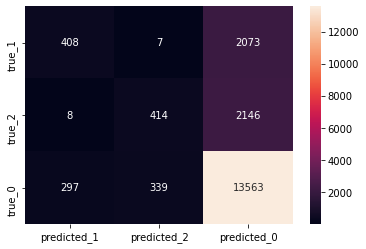

In [54]:
print("TEST DATA")
print("------ Return status results ------")
print("Mean target probability: ", test_result["return_status_prob"].mean())
print("Mean target log probability: ", test_result["return_status_logprob"].mean())
print("STATS: ", sklearn.metrics.classification_report(test_result["result"], test_result["predicted_return_status"]))
show_confusion_matrix(test_result, "result", "predicted_return_status")
print("------ Size results ------")
print("Mean target probability: ", test_result["size_prob"].mean())
print("Mean target log probability: ", test_result["size_logprob"].mean())
print("------ Combined result ------")
print("Mean target probability: ", test_result["full_prob"].mean())
print("Mean target log probability: ", test_result["full_logprob"].mean())

In [55]:
test_size_classification_stats = sklearn.metrics.classification_report(test_result["size"], test_result["predicted_size"])
print(test_size_classification_stats)

              precision    recall  f1-score   support

           0       0.10      0.05      0.07        40
           1       0.49      0.31      0.38      1335
           2       0.05      0.01      0.02        89
           3       0.05      0.03      0.03        80
           4       0.50      0.34      0.40      2958
           5       0.23      0.09      0.13       177
           6       0.00      0.00      0.00         2
           7       0.07      0.03      0.04        60
           8       0.28      0.71      0.40      4112
           9       0.18      0.07      0.10       260
          11       0.06      0.02      0.03        44
          12       0.40      0.22      0.28      2444
          13       0.08      0.08      0.08       274
          14       0.26      0.13      0.18      1159
          15       0.00      0.00      0.00        41
          16       0.38      0.20      0.26      1801
          17       0.14      0.06      0.08       178
          18       0.00    

/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martyna/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
